## Исследование данных о российском кинопрокате



Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений.<br> У одного фильма может быть несколько прокатных удостоверений. <br>
title — название фильма;<br>
puNumber — номер прокатного удостоверения;<br>
show_start_date — дата премьеры фильма;<br>
type — тип фильма;<br>
film_studio — студия-производитель;<br>
production_country — страна-производитель;<br>
director — режиссёр;<br>
producer — продюсер;<br>
age_restriction — возрастная категория;<br>
refundable_support — объём возвратных средств государственной поддержки;<br>
nonrefundable_support — объём невозвратных средств государственной поддержки;<br>
financing_source — источник государственного финансирования;<br>
budget — общий бюджет фильма;<br>
ratings — рейтинг фильма на КиноПоиске;<br>
genres — жанр фильма.<br>
Обратите внимание, что столбец budget уже включает в себя полный объём государственной поддержки.<br> Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. <br>
Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.<br>
puNumber — номер прокатного удостоверения;<br>
box_office — сборы в рублях.<br>

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings

# Отключение FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
mkrf_movies = pd.read_csv('mkrf_movies.csv')
mkrf_shows =  pd.read_csv('mkrf_shows.csv')

In [3]:
mkrf_shows.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [4]:
pd.options.display.float_format = '{:,.1f}'.format

In [5]:
mkrf_movies.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [6]:
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [7]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

В ходе первоначального и ознакомительного осмотра таблиц я вижу дубликаты по названиям фильмов, пропуски в столбцах.

In [8]:
#Найдем строчки датасета из-за которых не получается изменить тип данных.
mkrf_movies[~mkrf_movies['puNumber'].str.isdigit()]


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
mkrf_movies.loc[804, 'puNumber'] = mkrf_movies.loc[804, 'puNumber'].strip()
mkrf_movies.loc[1797, 'puNumber'] = '0'
mkrf_movies['puNumber'] = pd.to_numeric(mkrf_movies['puNumber'])
mkrf_movies['puNumber'].dtype

dtype('int64')

Для изменения типа данных в одной из строчки удалили пробел, а во второй заменили значение на ноль. 

In [10]:
mkrf_movies = mkrf_movies.merge(mkrf_shows, how='left')


In [11]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Данные не потеряны, таблицы объединены. 

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [12]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [13]:
#меняем тип данных для столбца "show_start_date"
mkrf_movies['show_start_date'] = pd.to_datetime(mkrf_movies['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   int64         
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

In [14]:
mkrf_movies['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [15]:
percent_raitings = mkrf_movies[mkrf_movies['ratings'].str.contains('[^0-9.]').fillna(False)]
percent_raitings

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715,2015-07-29 12:00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,99%,"ужасы,триллер,драма",NaN
811,От винта!,114000212,2012-08-06 12:00:00,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,28%,"детский,приключения,комедия","1,740.0"
1053,Песочный человек,121029212,2012-11-29 12:00:00,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,97%,"ужасы,фантастика,фэнтези",NaN
1341,Сказка о добре и Вре,111008913,2013-11-15 12:00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,99%,"триллер,драма,детектив",NaN
1805,Спираль.,111001014,2014-01-30 12:00:00,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,99%,"аниме,мультфильм,ужасы","4,295.0"
1874,Короткие истории о любви 2,121002615,2015-02-13 12:00:00,Художественный,"Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...",Нидерланды - США - Германия - Канада - Франция...,"Мэтью Аувро, Лео Брайдл, Бен Бренд, Ден Кларк,...","Мэри Пэт Бентел, Бен Бренд, Сиара Гиллан, Джор...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,NaN,"1,429,859.0"
1899,Золушка /По сказке Шарля Перро/. Холодное торж...,121003615,2015-02-27 12:00:00,Художественный,"Женр Филмз, Уолт Дисней Пикчерз",США,Кеннет Брана,"Дэвид Бэррон, Саймон Кинберг, Эллисон Ширмур",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,64%,"мюзикл,фэнтези,мелодрама","528,732,557.7"
2126,Поездка к матери,111002015,2015-03-02 12:00:00,Художественный,"ЗАО ""Киностудия ""М""-Фильм""",Россия,М.Косырев-Нестеров,М.Косырев-Нестеров,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,91%,"драма,семейный",0.0
2146,Главный,111003415,2015-03-27 12:00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.0,"10,000,000.0","40,000,000.0",Министерство культуры,94%,"фантастика,боевик,комедия","334,750.0"
2438,Самый рыжий Лис,111012715,2015-07-30 12:00:00,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,А.Стреляная,"А.Котелевский, Э.Пичугин",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,62%,"фэнтези,семейный",NaN


Часть значений столбца 'ratings' написано в формате процентов, а не общепривычным для нас от нуля до десяти. <br>
Сконвертируем значения с процентами в формат десятибальной оценки.

In [16]:
mkrf_movies.loc[percent_raitings.index, 'ratings'] = \
    percent_raitings['ratings'].str[0] + '.' + \
    percent_raitings['ratings'].str[1]
mkrf_movies['ratings'] = pd.to_numeric(mkrf_movies['ratings'])
mkrf_movies['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [17]:
mkrf_movies_nans = mkrf_movies.isna()
mkrf_movies_nans.sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

In [18]:
mkrf_movies_nans['year'] = mkrf_movies['show_start_date'].dt.year

In [19]:
mkrf_movies_nans.groupby(by= 'year').agg(sum).transpose()

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
title,0,0,0,0,0,0,0,0,0,0
puNumber,0,0,0,0,0,0,0,0,0,0
show_start_date,0,0,0,0,0,0,0,0,0,0
type,0,0,0,0,0,0,0,0,0,0
film_studio,1,0,0,0,1,0,0,0,12,4
production_country,1,0,0,0,0,0,1,0,0,0
director,5,2,1,1,0,0,0,0,0,0
producer,40,15,26,89,189,77,54,34,14,30
age_restriction,0,0,0,0,0,0,0,0,0,0
refundable_support,985,622,593,628,791,619,757,464,835,860


In [20]:
mkrf_movies[mkrf_movies['film_studio'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10 12:00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,Доживем до каникул?..,111021918,2018-11-15 12:00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"41,225.0"
6485,До и После,112014418,2018-12-05 12:00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.9,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Фильмы, у которых пусто в столбце 'film_stidio' почти все из России за исключением двух. Мульт личности - тоже российский, значит, вероятнее всего, часть фильмов, которые имеют пропуск в столбцах 'production_country', могут быть русского производства. Это нужно будет проверить позже.

In [21]:
mkrf_movies[mkrf_movies['director'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,"44,350.0"
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.9,"концерт,музыка",NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.7,"концерт,музыка",NaN


Пропуски в столбце 'director' связаны с тем, что это, вероятно, записи музыкальных концертов. Или же что-то подобное. Роли они не играют.

In [22]:
mkrf_movies[mkrf_movies['production_country'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия","194,527.0"
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


Снова подтверждается моя теория.

In [23]:
mkrf_movies['production_country'] = mkrf_movies['production_country'].fillna('Россия')
mkrf_movies[mkrf_movies['production_country'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [24]:
mkrf_movies['refundable_support'].unique()

array([         nan, 0.000000e+00, 5.000000e+07, 2.600000e+07,
       3.000000e+07, 1.500000e+07, 1.000000e+07, 2.000000e+07,
       7.153119e+06, 2.500000e+07, 4.000000e+07, 6.000000e+07,
       4.400000e+07, 2.900000e+07, 4.100000e+07, 3.600000e+07,
       3.500000e+06, 5.000000e+06, 1.900000e+07, 9.000000e+06,
       1.100000e+08, 1.700000e+07, 7.500000e+07, 1.500000e+08,
       3.800000e+07, 1.000000e+08, 5.500000e+07, 7.000000e+06,
       7.346881e+06, 8.000000e+06, 1.150000e+08, 3.500000e+07,
       1.800000e+08, 2.800000e+07, 8.000000e+07])

In [25]:
mkrf_movies.query('refundable_support.isna() == False')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,"26,500,000.0","79,411,900.0",Министерство культуры,8.1,"драма,мелодрама","365,353.6"
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,"26,000,000.0","37,142,857.0",Министерство культуры,NaN,NaN,"28,140.0"
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,"107,847,945.0","176,023,490.0",Фонд кино,5.3,"комедия,фантастика","19,957,031.5"
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,"28,000,000.0","40,574,140.0",Министерство культуры,4.2,драма,"55,917.5"
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,"25,000,000.0","40,015,122.0",Министерство культуры,6.4,драма,"232,100.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000.0","400,000,000.0","980,000,000.0",Фонд кино,6.0,"история,биография,драма","717,703,185.5"
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"100,000,000.0",0.0,"190,000,000.0",Фонд кино,6.7,"мультфильм,приключения,семейный","501,069,235.0"
7474,Вторжение,111022519,2019-12-23 12:00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.0","400,000,000.0","944,000,000.0",Фонд кино,5.7,"фантастика,боевик",NaN
7476,Я свободен,111023019,2019-12-26 12:00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,"30,000,000.0","46,154,000.0",Министерство культуры,5.9,драма,NaN


In [26]:
mkrf_movies.query('budget.isna() == False')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,"26,500,000.0","79,411,900.0",Министерство культуры,8.1,"драма,мелодрама","365,353.6"
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,"26,000,000.0","37,142,857.0",Министерство культуры,NaN,NaN,"28,140.0"
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,"107,847,945.0","176,023,490.0",Фонд кино,5.3,"комедия,фантастика","19,957,031.5"
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,"28,000,000.0","40,574,140.0",Министерство культуры,4.2,драма,"55,917.5"
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,"25,000,000.0","40,015,122.0",Министерство культуры,6.4,драма,"232,100.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000.0","400,000,000.0","980,000,000.0",Фонд кино,6.0,"история,биография,драма","717,703,185.5"
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"100,000,000.0",0.0,"190,000,000.0",Фонд кино,6.7,"мультфильм,приключения,семейный","501,069,235.0"
7474,Вторжение,111022519,2019-12-23 12:00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.0","400,000,000.0","944,000,000.0",Фонд кино,5.7,"фантастика,боевик",NaN
7476,Я свободен,111023019,2019-12-26 12:00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,"30,000,000.0","46,154,000.0",Министерство культуры,5.9,драма,NaN


In [27]:
rus_films = mkrf_movies.query('nonrefundable_support.isna() == False & budget.isna() == False & refundable_support.isna() == False & financing_source.isna() == False')
rus_films

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,"26,500,000.0","79,411,900.0",Министерство культуры,8.1,"драма,мелодрама","365,353.6"
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,"26,000,000.0","37,142,857.0",Министерство культуры,NaN,NaN,"28,140.0"
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,"107,847,945.0","176,023,490.0",Фонд кино,5.3,"комедия,фантастика","19,957,031.5"
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,"28,000,000.0","40,574,140.0",Министерство культуры,4.2,драма,"55,917.5"
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,"25,000,000.0","40,015,122.0",Министерство культуры,6.4,драма,"232,100.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000.0","400,000,000.0","980,000,000.0",Фонд кино,6.0,"история,биография,драма","717,703,185.5"
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"100,000,000.0",0.0,"190,000,000.0",Фонд кино,6.7,"мультфильм,приключения,семейный","501,069,235.0"
7474,Вторжение,111022519,2019-12-23 12:00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.0","400,000,000.0","944,000,000.0",Фонд кино,5.7,"фантастика,боевик",NaN
7476,Я свободен,111023019,2019-12-26 12:00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,"30,000,000.0","46,154,000.0",Министерство культуры,5.9,драма,NaN


In [28]:
rus_films['production_country'].unique()

array(['Россия', 'Россия, Франция, Латвия', 'Россия-Украина',
       'Россия, Италия', 'Россия, Украина, Польша',
       'Россия, Германия, Великобритания', 'Россия, Германия',
       'Россия, Армения', 'Россия-Словакия-Чехия',
       'Россия, Латвия, Чешская Республика',
       'Россия, Германия, Казахстан, Польша, Китай', 'Россия, Сербия',
       'Россия - Грузия', 'Россия-Китай', 'Россия, Бельгия, Финляндия'],
      dtype=object)

Фильмы, у которых имеется информация в столбцах refundable_support, nonrefundable_support, budget, financing_source одни и те же. И Фильмы эти созданы Россией или же совместно с Россией.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [29]:
print('Количество дублирующихся строк:', mkrf_movies.duplicated().sum())

Количество дублирующихся строк: 0


In [30]:
mkrf_movies.loc[mkrf_movies['title'].duplicated(keep=False)].sort_values(by='title').head(20)


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
455,100 миллионов евро,121013712,2012-06-06 12:00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,комедия,NaN
454,100 миллионов евро,221024616,2016-05-25 12:00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,комедия,NaN
4852,127 часов,121000811,2011-01-27 12:00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"триллер,биография,драма",NaN
5058,127 часов,221069011,2011-05-18 12:00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"триллер,биография,драма",NaN
3129,13 часов: Тайные солдаты Бенгази,221019616,2016-04-19 12:00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.7,"боевик,триллер,драма",NaN
3130,13 часов: Тайные солдаты Бенгази,121001016,2016-01-15 12:00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.7,"боевик,триллер,драма","18,439,240.6"
1494,13-й район: Кирпичные особняки,121008314,2014-04-25 12:00:00,Художественный,"Брик Мэншэнс Продакшнз,Синэ+ Канал+, Д8, Европ...",Франция-Канада,Камиль Деламарр,"Люк Бессон, Клод Леже, Джонатан Вэнджер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.5,"боевик,криминал",750.0
1493,13-й район: Кирпичные особняки,221033314,2014-08-20 12:00:00,Художественный,"Брик Мэншэнс Продакшнз,Синэ+ Канал+, Д8, Европ...",Франция-Канада,Камиль Деламарр,"Люк Бессон, Клод Леже, Джонатан Вэнджер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.5,"боевик,криминал",NaN
4107,13.,221123710,2010-10-25 12:00:00,Художественный,"Барбариан Филмз, Магнет Медиа Групп, Морабито ...",США,Гела Баблуани,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.8,"триллер,драма,криминал",NaN
4307,13.,121018110,2010-09-30 12:00:00,Художественный,"Барбариан Филмз, Магнет Медиа Групп, Морабито ...",США,Гела Баблуани,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.8,"триллер,драма,криминал",NaN


Найденные дубликаты по названию это показы одних и тех же фильмов в другое время(ибо даты отличаются) 

In [31]:
mkrf_movies.loc[mkrf_movies['puNumber'].duplicated(keep=False)]


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


дубликаты по puNumber больше похожи на человеческую ошибку при заполнении таблицы, других вариантов нет.

In [32]:
#удалил лишние пробелы в начале и в конце, чтоб избежать дубликатов
mkrf_movies['type'] = mkrf_movies['type'].str.strip()
mkrf_movies['type'].unique()


array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [33]:
mkrf_movies ['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

Здесь всё отлично. Столбец 'age_restriction' выглядит приемлимо

In [34]:
mkrf_movies ['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

И здесь всё тоже отлично. Столбец 'financing_source' выглядит хорошо.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

Сделано выше

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [35]:
mkrf_movies.query('budget == 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,"23,000,000.0",0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,"10,234,016.1"
2058,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,"75,000,000.0",0.0,Фонд кино,6.6,драма,"446,163,511.0"
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.0","70,000,000.0",0.0,Фонд кино,7.8,"боевик,драма,криминал","196,572,438.4"
2532,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.0",0.0,0.0,Фонд кино,6.2,"комедия,фэнтези","67,418,974.8"
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.0","100,000,000.0",0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези","184,487,551.4"
2684,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,"59,000,000.0",0.0,Фонд кино,6.3,"комедия,драма","1,957,738.5"
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,"35,000,000.0",0.0,Фонд кино,5.1,"комедия,мелодрама","72,937,783.2"
2874,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,"6,000,000.0",0.0,Министерство культуры,4.3,комедия,"15,362,931.4"
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.0","51,000,000.0",0.0,Фонд кино,6.3,"комедия,мелодрама","70,299,052.0"
3565,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,"250,000,000.0",0.0,Фонд кино,5.6,фантастика,"1,038,321,489.0"


Есть фильмы, где бюджет равен нулю, хотя в  refundable_support и nonrefundable_support присутствуют значения.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [36]:
mkrf_movies['year'] = mkrf_movies['show_start_date'].dt.year
mkrf_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [37]:
def add_main(mkrf_movies, columns):
    for column in columns:
        mkrf_movies[f'main_{column}'] = mkrf_movies[column].dropna().apply(lambda x: x.split(',')[0])
    return mkrf_movies
mkrf_movies = add_main(mkrf_movies, ['director', 'genres'])
mkrf_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genres
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [38]:
mkrf_movies['support_percentage'] = (mkrf_movies['refundable_support'] + mkrf_movies['nonrefundable_support']) / mkrf_movies['budget']
median_perc = mkrf_movies['support_percentage'].median()
print(f'Средняя доля государственной поддержки в фильмах: {median_perc:0.2%}')

Средняя доля государственной поддержки в фильмах: 61.40%


### Шаг 3. Проведите исследовательский анализ данных


In [39]:
#Создаем сводную таблицу с информацией, которая нам, вероятнее всего, сможет понадобиться.
mkrf_movies_pivot = mkrf_movies.loc[mkrf_movies['box_office'].notna(), ['year', 'box_office']] \
                .groupby('year') \
                .agg(['count', 'sum', 'mean', 'median'])

mkrf_movies_pivot.columns = mkrf_movies_pivot.columns.get_level_values(1)
mkrf_movies_pivot

,count,sum,mean,median
year,,,,
2010,105,"2,428,654.0","23,130.0","1,700.0"
2011,109,"14,102,765.0","129,383.2","3,000.0"
2012,128,"6,955,423.0","54,339.2","5,660.0"
2013,184,"29,799,706.2","161,954.9","3,522.5"
2014,279,"7,444,951,859.2","26,684,415.3","18,160.0"
2015,465,"39,497,365,196.4","84,940,570.3","4,920,933.0"
2016,526,"47,866,299,741.9","91,000,569.9","3,846,679.4"
2017,357,"48,563,707,217.5","136,032,793.3","9,968,340.0"
2018,475,"49,668,403,134.3","104,565,059.2","8,891,102.2"


In [40]:
mkrf_movies.query('year < 2015 & box_office > 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genres,support_percentage
6,Любовь и голуби,111007013,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия","2,700.0",2013,В.Меньшов,мелодрама,NaN
22,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.7,"комедия,мелодрама,криминал",380.0,2013,Л.Гайдай,комедия,NaN
38,Мужики!..,111007213,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,И.Бабич,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.1,драма,"1,165.0",2013,И.Бабич,драма,NaN
47,Андрей Рублев.,111029814,2014-12-24 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,А.Тарковский,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.2,"драма,биография,история","22,660.0",2014,А.Тарковский,драма,NaN
52,Айболит - 66,111010513,2013-12-19 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ролан Быков,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.1,"мюзикл,комедия,детский","1,795.0",2013,Ролан Быков,мюзикл,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372,Джейн Эйр-,121015011,2011-08-15 12:00:00,Художественный,"Би-Би-Си Филмз, Фокус Фьючерз. Руби Филмз",США - Великобритания,Кэри Фукунага,"Элисон Оуэн, Пол Триджбитс, Маири Бетт",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.4,"драма,мелодрама","25,770.0",2011,Кэри Фукунага,драма,NaN
5374,Необычайные приключения мистера Веста в Стране...,211050311,2011-12-29 12:00:00,Художественный,Госкино,СССР,Л.Кулишов,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.9,комедия,"6,340.0",2011,Л.Кулишов,комедия,NaN
5380,ШПИОН,111009411,2011-12-09 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова",Россия,А.Андрианов,"С.Шумаков, Л.Верещагин",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.1,"боевик,комедия,криминал","5,405.0",2011,А.Андрианов,боевик,NaN
5388,ВОИН.com,111004411,2011-07-04 12:00:00,Художественный,"ООО ""Культурные инициативы""",Россия,Е.Бычкова,"В.Малышев, А.Малышев",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,4.7,комедия,465.0,2011,Е.Бычкова,комедия,NaN


Имеется проблема с фильмами до 2015 года. В основном, в таблице по кассовым сборам есть ошибки и сложности.<br>
Как мне кажется, что фильмы производства СССР были или в чрезвычайно узком формате транслированы в мелких кинотеатрах или же что-то еще <br>
А фильмы производства других стран, возможно, указаны в долларах. С этим ничего нельзя уже поделать, в будущем это нужно учитывать и качественнее собирать данные для таблицы.

- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Процент фильмов с информацией о сборах: 42.19%


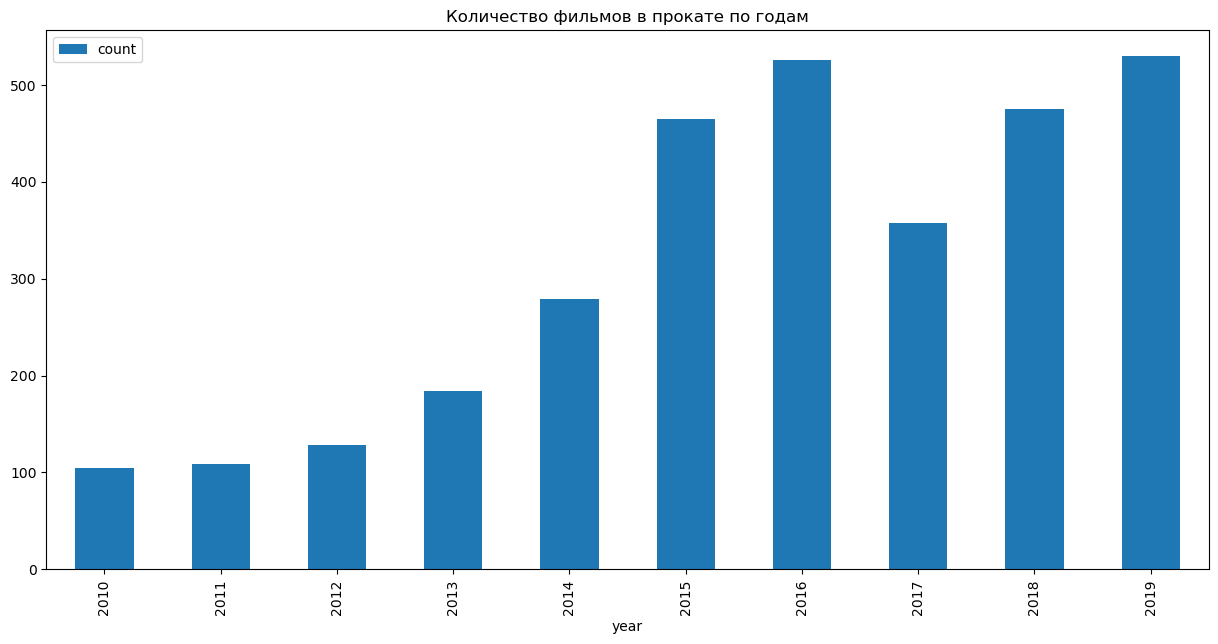

In [41]:
mkrf_movies_pivot.plot(title='Количество фильмов в прокате по годам', kind='bar', y='count', figsize= (15,7))
print(f'Процент фильмов с информацией о сборах: {mkrf_movies.box_office.notna().mean():0.2%}')

Фильмов с информацией о сборах - мало, всего 42%.<br>
По кол-ву фильмов виден рост до 2016 года. Далее спад в 2017 и вновь рост до 2019 года


- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Минимальные сборы были в 2010 году
Максимальные сборы были в 2018 году


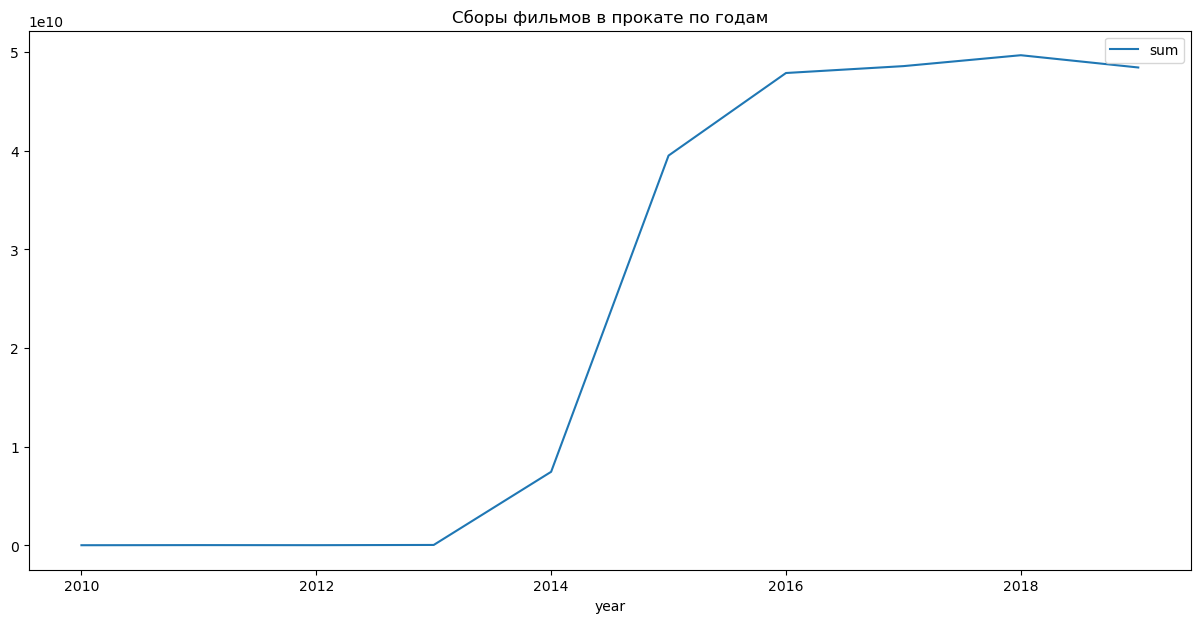

In [42]:
mkrf_movies_pivot.plot(title='Сборы фильмов в прокате по годам', kind='line', y='sum', figsize= (15,7))
print(f"Минимальные сборы были в {mkrf_movies_pivot['sum'].idxmin()} году")
print(f"Максимальные сборы были в {mkrf_movies_pivot['sum'].idxmax()} году")

С 2010 года по 2013 год сборы примерно одинаковыми были, а вот далее до 2016 года был резкий рост.<br>
с 2016 и до 2019 примерно одинаковая сумма сборов.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [43]:
mkrf_movies_pivot['mean']

year
2010        23,130.0
2011       129,383.2
2012        54,339.2
2013       161,954.9
2014    26,684,415.3
2015    84,940,570.3
2016    91,000,569.9
2017   136,032,793.3
2018   104,565,059.2
2019    91,369,261.8
Name: mean, dtype: float64

In [44]:
mkrf_movies_pivot['median']

year
2010       1,700.0
2011       3,000.0
2012       5,660.0
2013       3,522.5
2014      18,160.0
2015   4,920,933.0
2016   3,846,679.4
2017   9,968,340.0
2018   8,891,102.2
2019   4,627,798.3
Name: median, dtype: float64

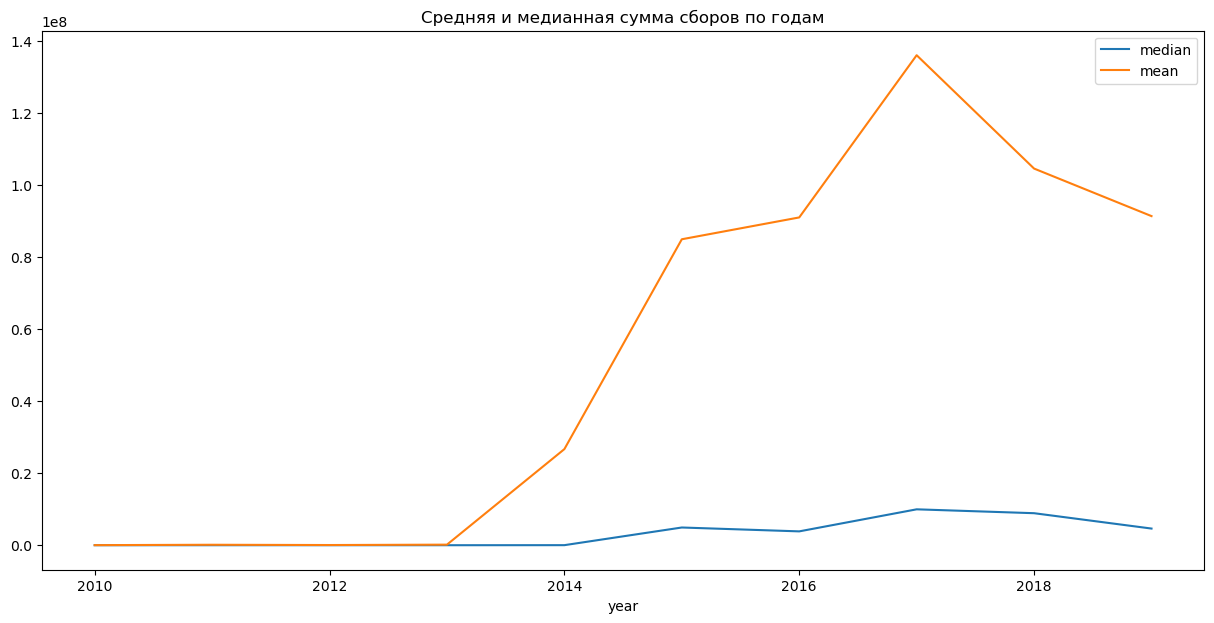

In [45]:
mkrf_movies_pivot.plot(title='Cредняя и медианная сумма сборов по годам', kind='line', y=['median', 'mean'], figsize= (15,7))
plt.show()


Судя по графику медианная особо не менялась по годам, а вот средняя с 2013 до 2017 имела положительную тенденцию роста и ослабла после падением с 2017 по 2019 год

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [46]:
pivot_age_restriction = mkrf_movies[mkrf_movies['box_office'].notna()] \
    .pivot_table(index='year',
                columns='age_restriction',
                values='box_office',
                aggfunc='sum')
pivot_age_restriction

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
year,,,,,
2010,"1,887,611.0","120,146.0","366,512.0","54,385.0",NaN
2011,"13,499,871.0","219,891.0","381,513.0","1,040.0",450.0
2012,"2,266,483.0","108,734.0","3,254,216.0","182,580.0","1,143,410.0"
2013,"2,710,302.5","20,910,336.5","658,069.6","5,161,245.6","359,752.0"
2014,"375,562,258.2","2,584,782,324.0","544,280,086.7","2,209,712,746.9","1,730,614,443.4"
2015,"379,054,578.4","13,616,082,008.9","11,368,120,870.3","5,432,308,367.4","8,701,799,371.4"
2016,"150,228,848.7","12,204,446,524.4","16,664,548,541.7","6,793,929,818.9","12,053,146,008.2"
2017,"229,598,930.0","7,851,427,660.7","18,745,042,900.1","9,651,495,581.0","12,086,142,145.8"
2018,"32,449,002.1","14,267,291,660.7","16,503,602,347.0","8,760,085,501.1","10,104,974,623.4"


In [47]:
pivot_age_restriction.mean()

age_restriction
«0+» - для любой зрительской аудитории     120,500,395.2
«12+» - для детей старше 12 лет          6,322,558,806.0
«16+» - для детей старше 16 лет          7,658,367,404.1
«18+» - запрещено для детей              4,297,472,757.0
«6+» - для детей старше 6 лет            6,392,303,206.1
dtype: float64

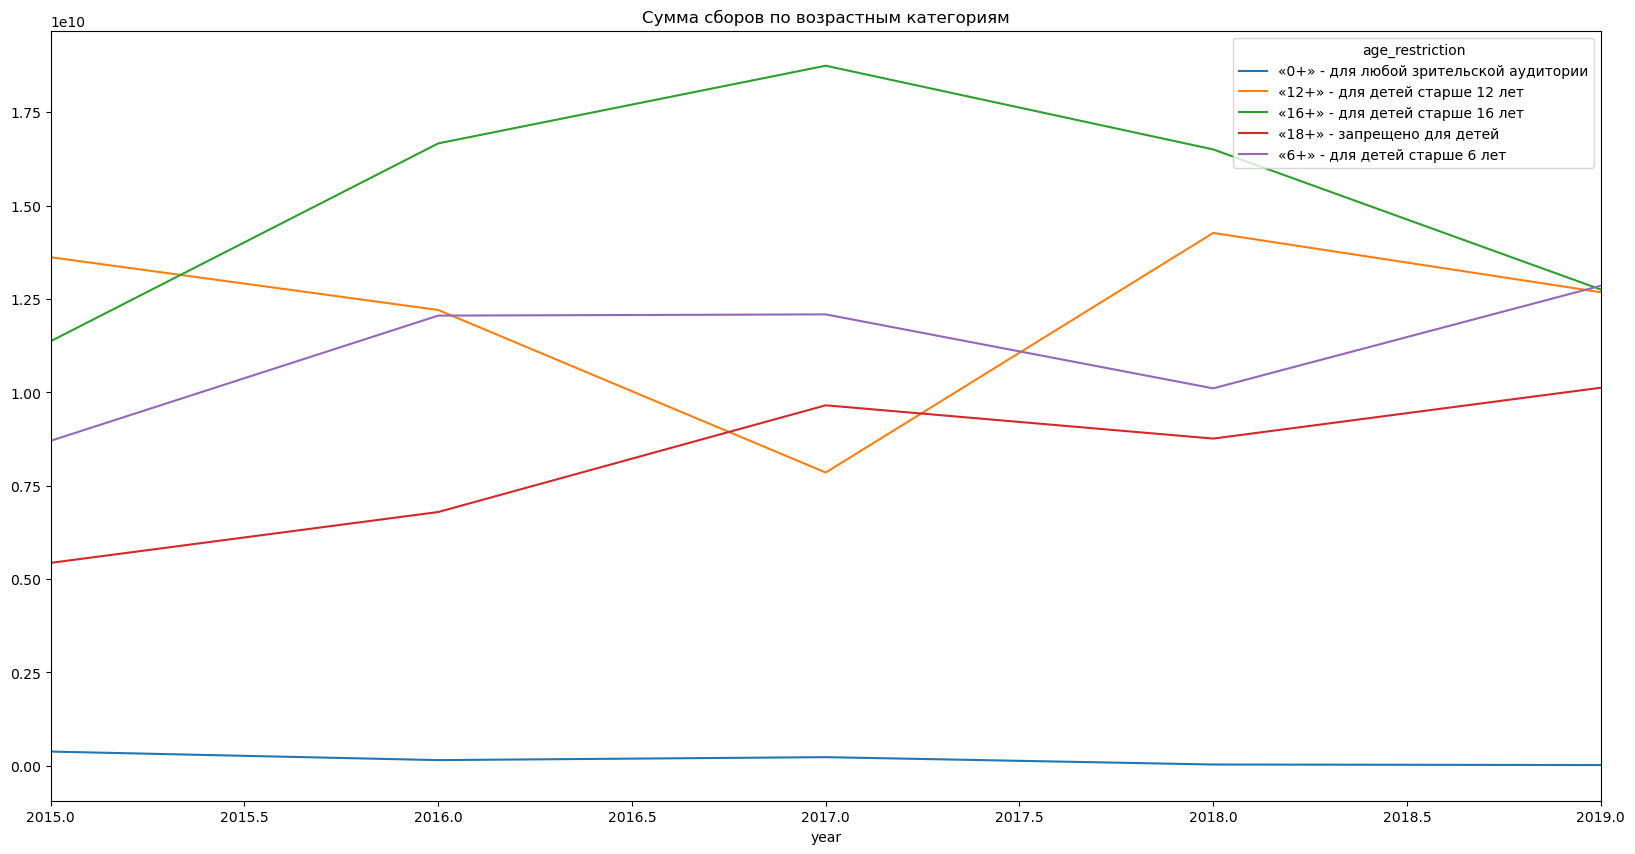

In [48]:
pivot_age_restriction.plot(title='Сумма сборов по возрастным категориям', kind='line', xlim=[2015, 2019], figsize = (20,10))
plt.show()

В 2019 году суммы сборов по категориям 12+, 16+, 6+ оказались примерно одинаковыми.<br>
Фильмы, запрещенные для детей, собрали чуть меньше.<br>
А категория "для всех возрастов" собрала меньшее кол-во денег.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [49]:
data = mkrf_movies[mkrf_movies['refundable_support'].notna() & mkrf_movies['nonrefundable_support'].notna()].copy()
data['full_support'] = data['nonrefundable_support'] + data['refundable_support']

data['profitability'] = data['box_office'] / data['full_support'] - 1

data['is_paid_off'] = data['profitability'] > 0

data['is_not_paid_off'] = ~data['is_paid_off']


In [50]:
top_ratings = data.sort_values(by='ratings',ascending= False)
top_ratings.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,genres,box_office,year,main_director,main_genres,support_percentage,full_support,profitability,is_paid_off,is_not_paid_off
2146,Главный,111003415,2015-03-27 12:00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.0,...,"фантастика,боевик,комедия","334,750.0",2015,Ю.Кара,фантастика,0.2,"10,000,000.0",-1.0,False,True
3139,Я умею вязать,111019615,2015-11-27 12:00:00,Художественный,"ООО ""Белое Зеркало""",Россия,Н.Степанова при участии С.Иванова,"С.Кикнавелидзе, Д.Улюкаев",«16+» - для детей старше 16 лет,0.0,...,драма,"801,370.0",2015,Н.Степанова при участии С.Иванова,драма,0.3,"4,700,000.0",-0.8,False,True
3627,БОЛЬШОЙ,111017416,2016-11-22 12:00:00,Художественный,"ЗАО ""ПРОДЮСЕРСКАЯ КОМПАНИЯ ВАЛЕРИЯ ТОДОРОВСКОГО""",Россия,В.Тодоровский,"В.Тодоровский, А.Златопольский",«12+» - для детей старше 12 лет,"10,000,000.0",...,"криминал,комедия,боевик","228,578,204.0",2016,В.Тодоровский,криминал,0.7,"210,000,000.0",0.1,True,False
1870,А зори здесь тихие..._,111002915,2015-03-16 12:00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,NaN,«12+» - для детей старше 12 лет,"50,000,000.0",...,"драма,военный,история","249,166,767.7",2015,Р.Давлетьяров,драма,0.7,"150,000,000.0",0.7,True,False
6855,Миллиард,111006719,2019-04-17 12:00:00,Художественный,"ООО ""Медиа Юниверсал Ивент""",Россия,Р.Прыгунов,"В.Маслов, В.Верещагин, Б.Анисимов",«12+» - для детей старше 12 лет,0.0,...,драма,"408,646,665.7",2019,Р.Прыгунов,драма,0.6,"140,000,000.0",1.9,True,False
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,"драма,мелодрама","365,353.6",2013,А.Атанесян,драма,0.3,"26,500,000.0",-1.0,False,True
3782,Мотылёк.,111001617,2017-03-22 12:00:00,Художественный,"ООО ""Кинокомпания КИТ""",Россия,К.Худяков,"Е.Бабенко, В.Ремизов",«18+» - запрещено для детей,"7,346,881.0",...,драма,"410,058.0",2017,К.Худяков,драма,0.6,"37,346,881.0",-1.0,False,True
7180,Байкал - Сердце мира 3D,112004619,2019-11-01 12:00:00,Документальный,"ООО ""Продюсерский центр ""Новое Время""",Россия,А.Попова,"И.Добровольский, А.Разуваева, Ю.Перкуль",«0+» - для любой зрительской аудитории,0.0,...,семейный,NaN,2019,А.Попова,семейный,0.1,"3,000,000.0",NaN,False,True
7254,Герой,111015819,2019-09-26 12:00:00,Художественный,"ООО ""Карго""",Россия,К.Оганисян,К.Оганисян,«12+» - для детей старше 12 лет,"20,000,000.0",...,"фэнтези,боевик,драма","172,871,342.0",2019,К.Оганисян,фэнтези,0.5,"120,000,000.0",0.4,True,False
2482,Однажды._,111004215,2015-04-15 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА"", НП ""Интерфест""",Россия,Р.Давлетьяров,"Р.Давлетьяров, А.Котелевский",«16+» - для детей старше 16 лет,0.0,...,"драма,криминал,детектив","12,748,398.3",2015,Р.Давлетьяров,драма,0.6,"97,000,000.0",-0.9,False,True


Лучшим фильмом по рейтингу стал фильм "Главный". 

In [51]:
data.loc[data['ratings'] == data['ratings'].min()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,genres,box_office,year,main_director,main_genres,support_percentage,full_support,profitability,is_paid_off,is_not_paid_off
3515,Взломать блогеров,111016616,2016-10-28 12:00:00,Художественный,"ООО ""ТаББаК""",Россия,М.Свешников,Т.Бекмамбетов,«6+» - для детей старше 6 лет,0.0,...,"комедия,мультфильм,фантастика","7,323,648.0",2016,М.Свешников,комедия,0.7,"25,000,000.0",-0.7,False,True


Худшим фильмом по рейтингу стал "Взломать блогеров"

In [52]:
data.loc[data['box_office'] == data['box_office'].max()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,genres,box_office,year,main_director,main_genres,support_percentage,full_support,profitability,is_paid_off,is_not_paid_off
7456,Холоп,111021719,2019-12-19 12:00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,"25,000,000.0",...,комедия,"3,073,568,690.8",2019,К.Шипенко,комедия,0.4,"60,000,000.0",50.2,True,False


Больше всего денег в прокате заработал фильм Холоп. Но на текущее время мы уже знаем, что "Чебурашка" побил этот рекорд.

In [53]:
list_for_plot = ['refundable_support', 'box_office',  'full_support']
for value in list_for_plot:
    corr = data['ratings'].corr(data[value])
    print(f'Корреляция между оценкой фильма и {value} : {corr:0.2%}')

Корреляция между оценкой фильма и refundable_support : -0.38%
Корреляция между оценкой фильма и box_office : 14.38%
Корреляция между оценкой фильма и full_support : 10.22%


Было предсказуемо, но проверить хотелось. 

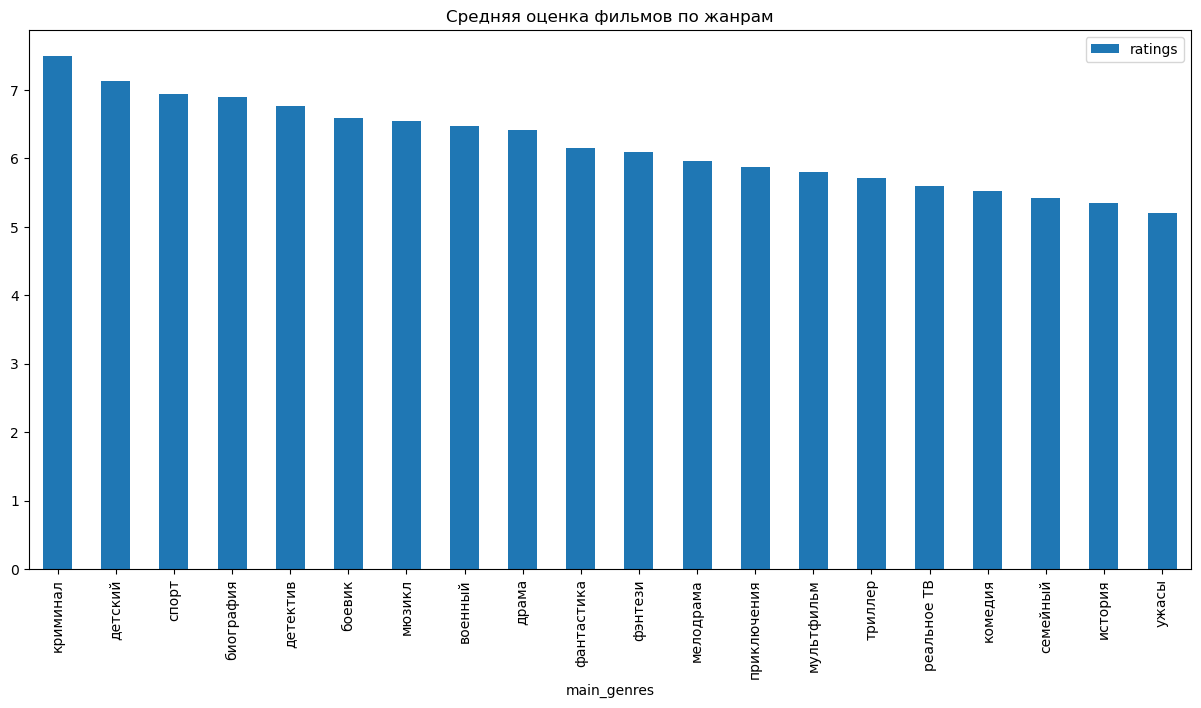

In [54]:
data[['main_genres', 'ratings']].groupby('main_genres') \
                                        .agg('mean') \
                                        .sort_values(by='ratings', ascending=False) \
                                        .plot(title='Cредняя оценка фильмов по жанрам', kind='bar',figsize= (15,7))
plt.show()

Лидируют по рейтингу фильмы жанра Криминал. А худшими по рейтингу оказались Ужасы.

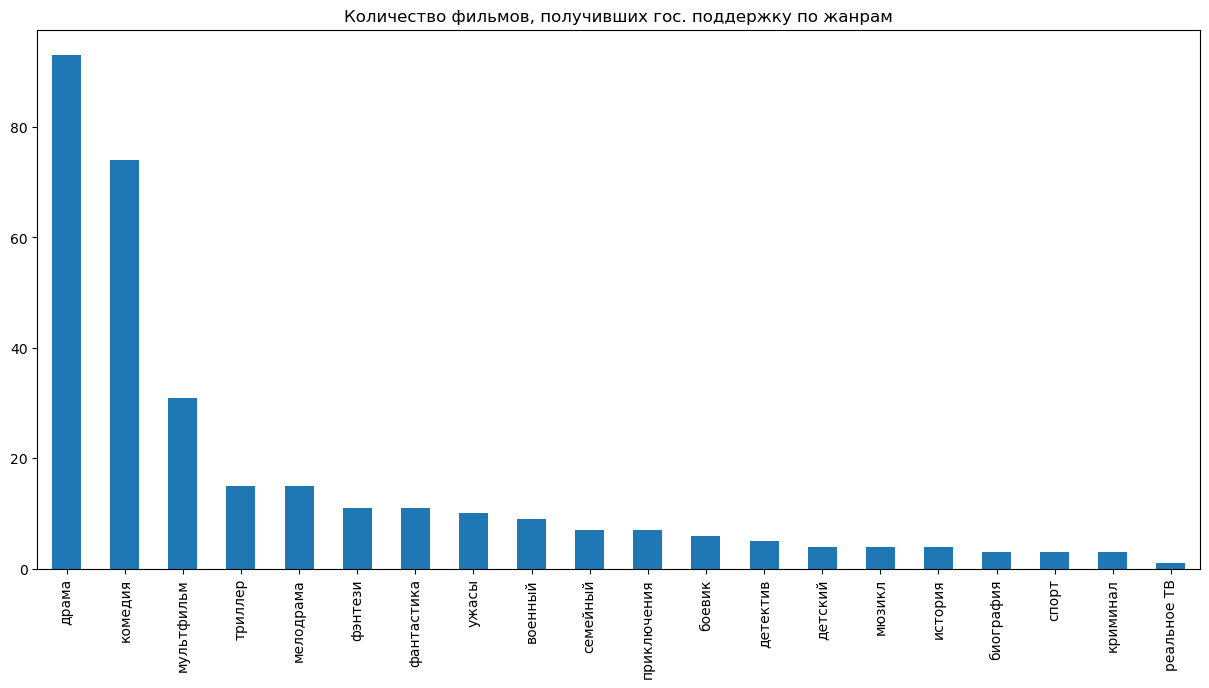

In [55]:
data['main_genres'].value_counts().plot(title='Количество фильмов, получивших гос. поддержку по жанрам', kind='bar',figsize= (15,7))
plt.show()

Фильмов жанра Драма, которые получили гос.поддержку - больше всего. <br>
Но надо понимать, что драма - самый популярный жанр в кинематографе. 

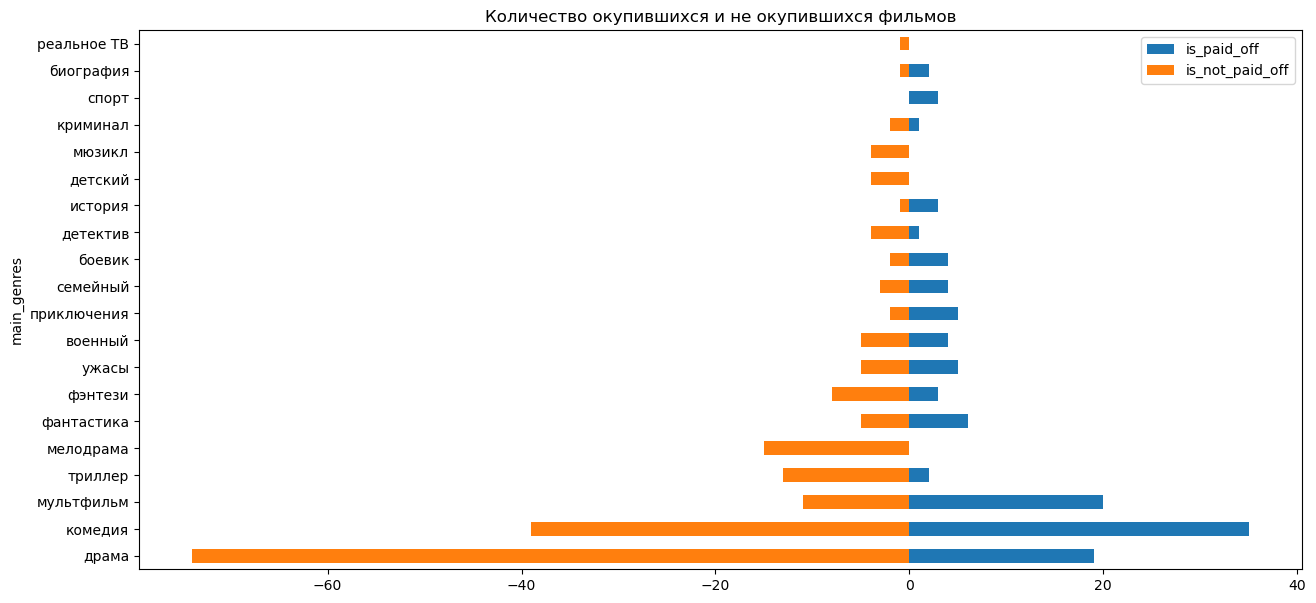

In [56]:
data.groupby('main_genres') \
            .agg({'title': 'count',
                  'is_paid_off': 'sum',
                  'is_not_paid_off': lambda x: 0 - x.sum()}) \
            .sort_values(by='title',
                         ascending=False) \
            .plot(title='Количество окупившихся и не окупившихся фильмов',
                  kind='barh',
                  stacked=True,
                  y=['is_paid_off', 'is_not_paid_off'],
                  figsize=(15,7))
plt.show()

Как драмы были самыми частыми гостями государственных вложений, так и стали они фаворитами по кол-ву "провалившихся" фильмов в прокате.

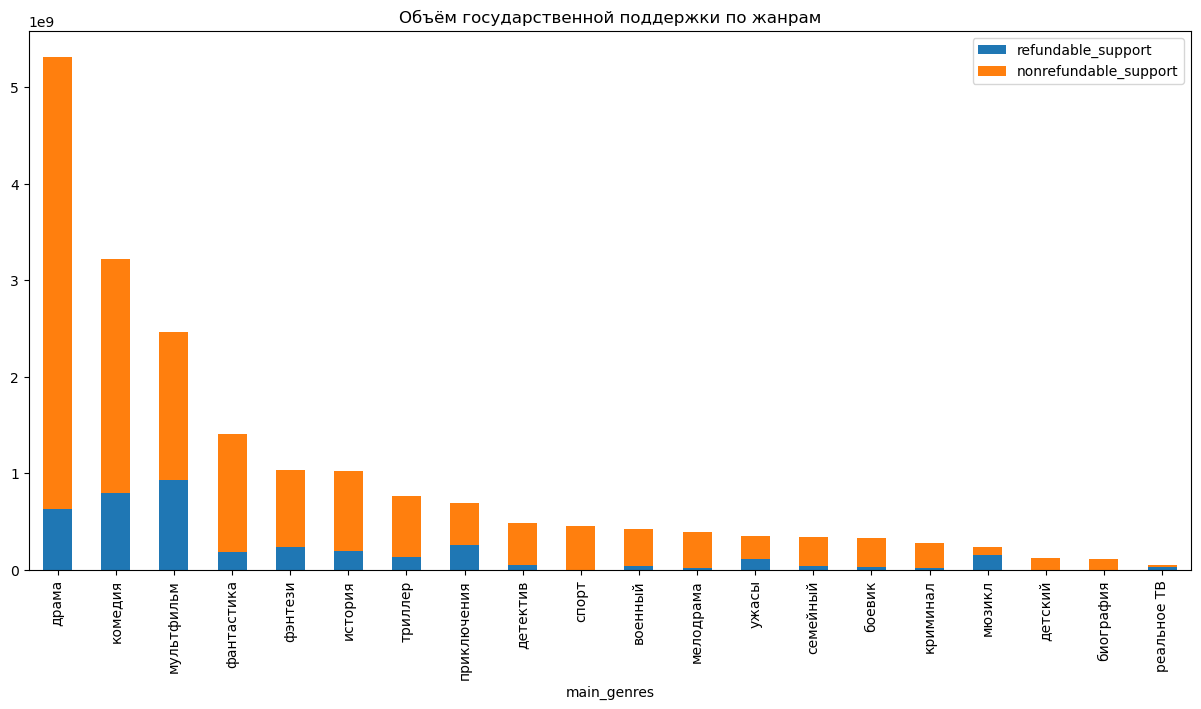

In [57]:
data.groupby('main_genres') \
            .agg('sum') \
            .sort_values(by='full_support',
                         ascending=False) \
            .plot(title='Объём государственной поддержки по жанрам',
                  kind='bar',
                  stacked=True,
                  y=['refundable_support', 'nonrefundable_support'],
                  figsize=(15,7))
plt.show()

В целом, по всем жанрам объёмы невозвратной поддержки от гос-ва куда больше поддержки, которую необходимо будет вернуть. <br>
Однако, из графика видны жанры, где процент невозвратной поддержки около 100%


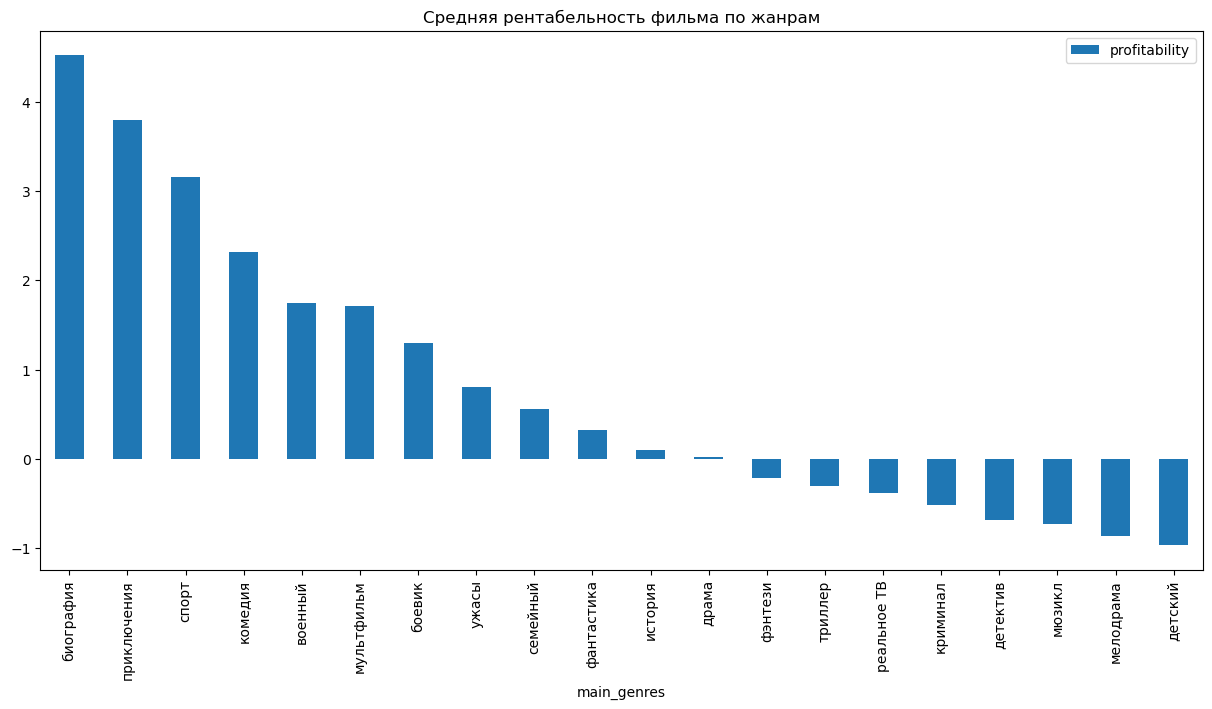

In [58]:
data.groupby('main_genres') \
            .agg('mean') \
            .sort_values(by='profitability',
                         ascending=False) \
            .plot(title='Средняя рентабельность фильма по жанрам',
                  kind='bar',
                  stacked=True,
                  y='profitability',
                  figsize=(15,7))
plt.show()

Рентабельность жанра "биография" - самая высокая. <br>
Худшая же рентабельность у жанра "детский"

### Шаг 5. Напишите общий вывод

В ходе исследовательского проекта были соединены две таблицы. Одна с данными о прокате фильмов, а вторая с их результатами в виде суммы сборов проката. <br>
Была проведена <b><i> предообработка данных </b></i>, а именно:</p> 
<ul><li>Изменили тип данных для столбца о дате начале показа в кинотеатрах.
    <li>Нашли в таблице , что столбец рейтинги имеет два вида: в процентах и десятибальной сс (системе счисления).
    <li>Преобразовали столбец рейтинги в единую сс.
    <li>Нашли дубликаты.
    <li>Добавили дополнительные два столбца: с именем и фамилией главного режиссёра и основным жанром фильма.</ul> </p> 
</p> В результате <b><i>анализа</b></i> нашлись проблемы датасета, в информации о кассовых сборах до 2015 были значения аномально-маленькие, связано это с тем, что исчисление было в другой валюте или же просто в результате некачественного сбора информации. <br>
Далее детальнее рассмотрим итоги конкретно российского производства фильмов. <br>
Средняя доля государственной поддержки в фильмах: 61.40%<br>
Также обнаружили максимальные сборы в 2018 году среди фильмов. Минимальные же были в 2010 году <br>
В 2019 году суммы сборов по категориям 12+, 16+, 6+ оказались примерно одинаковыми.<br>
Фильмы, запрещенные для детей, собрали чуть меньше.<br>
А категория "для всех возрастов" собрала меньшее кол-во денег.<br>
Худшим фильмом среди всех, на которые выделялись деньги в виде помощи от гос-ва, оказался фильм - "Взломать блогеров"<br>
А лучшим - "Главный"<br>
Если оценивать по кассовым сборам, то наибольшее кол-во денег собрал фильм "Холоп".<br>
Жанр "драма" получал наибольшее кол-во средств поддержки от гос-ва.<br>
Также этот жанр был и самым провальным по кол-ву фильмов, которые не окупились в прокате.<br>
Самым рентабельным жанром оказался "биография, а антирекорд присужден жанру "детский" <br>



---